In [211]:
# Importing Dependencies

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import GridSearchCV

In [213]:
# Reading the data

In [214]:
df = pd.read_csv('../data/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [215]:
df.shape

(3276, 10)

In [216]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [217]:
len(df.columns)

10

In [218]:
# Exploratory Data Analysis

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [220]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


<Axes: >

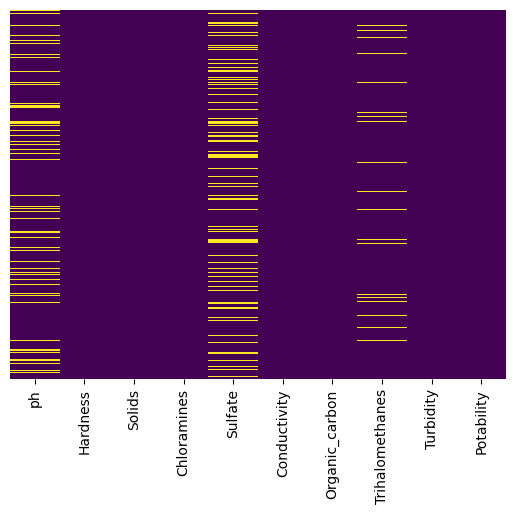

In [221]:
# Checking for Missing Values
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)

In [222]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<Axes: >

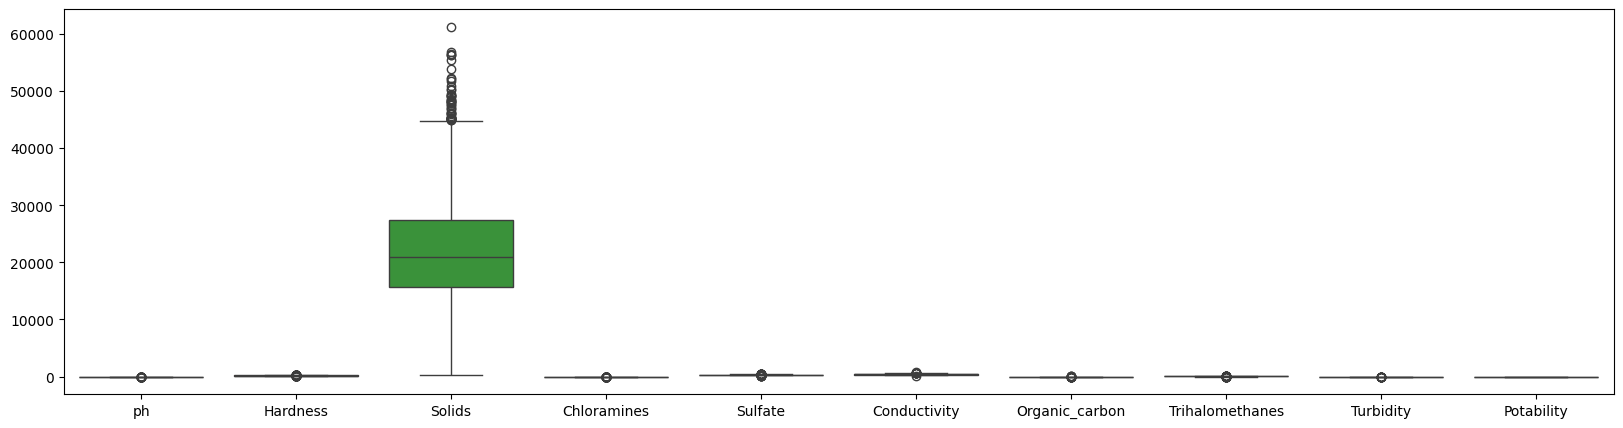

In [223]:
# Checking Outliers
plt.figure(figsize=(20,5))
sns.boxplot(df)

In [224]:
# Checking for duplicates
df.duplicated().sum()

0

In [225]:
# Feature Engineering

In [226]:
# Handling Missing Values
# Replace missing values with the mean of selected columns

mean_cols = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']  # Replace with your selected columns
df[mean_cols] = df[mean_cols].fillna(df[mean_cols].mean())

# # Replace missing values with the median of selected columns
# median_cols = ['Solids']  # Replace with your selected columns
# df[median_cols] = df[median_cols].fillna(df[median_cols].median())

In [227]:
# Checking Imbalance
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [228]:
# Handling the Outliers
def handle_outliers(df, column):
    Q1 = np.percentile(df[column], 25, method='midpoint')
    Q3 = np.percentile(df[column], 75, method='midpoint')
    IQR = Q3 - Q1
    upper = Q3 +1.5*IQR
    lower = Q1 - 1.5*IQR
    median = df[column].median()

    df.loc[df[column] > upper, column] = median
    df.loc[df[column] < lower, column] = lower

In [229]:
# for column in df.columns[:-1]:
#     handle_outliers(df, column)

<Axes: >

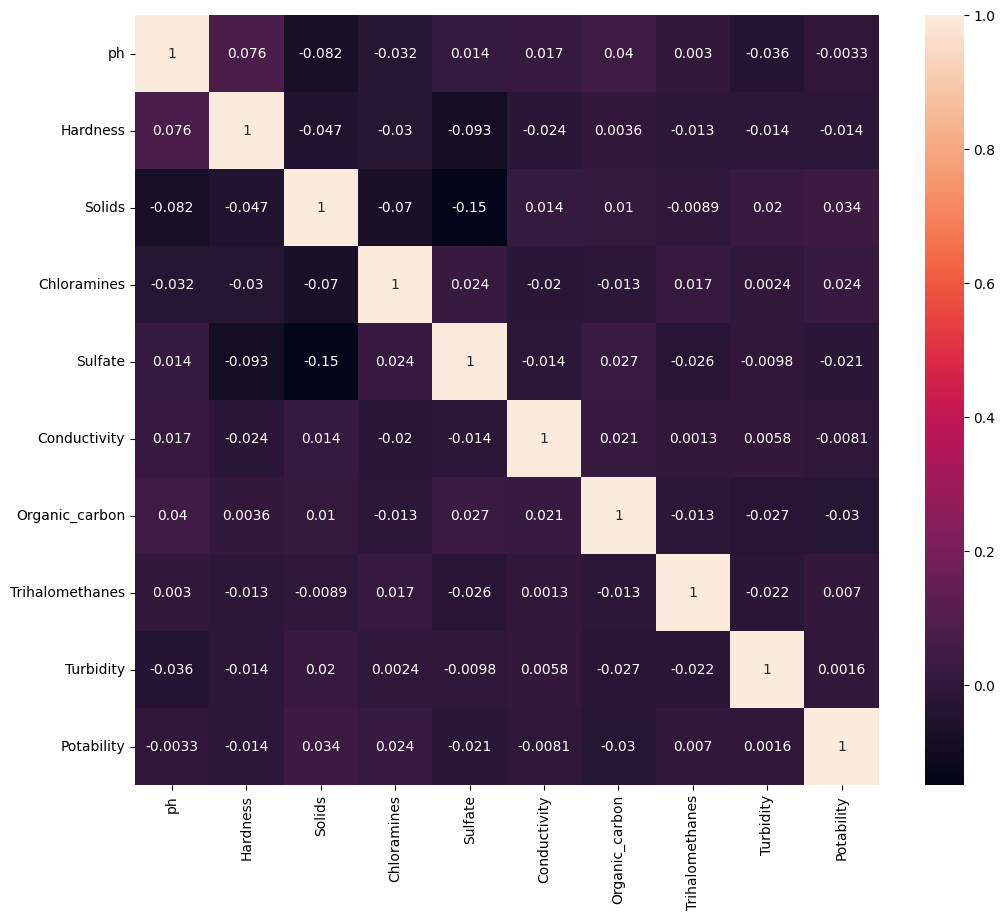

In [230]:
# Correlation
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

In [231]:
# Splitting our data
X = df.drop('Potability', axis=1)
y = df['Potability']

In [202]:
# Handling Imbalance using SMOTE to improve accuracy
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X, y = smote.fit_resample(X, y)

y.value_counts()

Potability
0    1998
1    1998
Name: count, dtype: int64

In [203]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3991,7.864006,213.390369,20172.069805,7.809195,356.525641,483.434512,14.520840,55.351541,3.854362
3992,6.108078,195.000096,34065.789610,8.111958,282.466808,468.325612,12.834383,75.437269,4.557095
3993,9.528874,210.952488,18142.025569,7.811516,337.860331,338.889149,18.591983,81.199589,4.219568
3994,5.139665,230.190385,11983.685918,6.315947,334.090377,403.877308,11.195736,77.680183,4.698958


In [232]:
# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [233]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state= 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2194, 9), (1082, 9), (2194,), (1082,))

In [234]:
# Model Trainning

In [235]:
models = {
    'Logistic Regression' : LogisticRegression(),
    'Support Vector Classifier' : SVC(),
    'Decision Tree Classifier' : DecisionTreeClassifier(),
    'Random Forest Classifer' : RandomForestClassifier(n_estimators=100, max_depth=30),
    'K Nearest Neighbors Classifier' : KNeighborsClassifier(),
    'Gradient Boosting Classifier' : GradientBoostingClassifier()
}

In [236]:
for model in models:
    m = models[model].fit(X_train, y_train)
    pred = m.predict(X_test)
    print(f'Accuracy Score for {model} is {accuracy_score(y_test, pred)}')
    # print(classification_report(y_test, pred))

Accuracy Score for Logistic Regression is 0.6284658040665434
Accuracy Score for Support Vector Classifier is 0.6885397412199631
Accuracy Score for Decision Tree Classifier is 0.5878003696857671
Accuracy Score for Random Forest Classifer is 0.678373382624769
Accuracy Score for K Nearest Neighbors Classifier is 0.6349353049907579
Accuracy Score for Gradient Boosting Classifier is 0.6598890942698706


In [401]:
for model in models:
    m = models[model].fit(X_train, y_train)
    pred = m.predict(X_train)
    print(f'Accuracy Score for {model} is {accuracy_score(y_train, pred)}')
    # print(classification_report(y_test, pred))

Accuracy Score for Logistic Regression is 0.518864400448263
Accuracy Score for Support Vector Classifier is 0.7452372058274187
Accuracy Score for Decision Tree Classifier is 1.0
Accuracy Score for Random Forest Classifer is 1.0
Accuracy Score for K Nearest Neighbors Classifier is 0.7672768023907359
Accuracy Score for Gradient Boosting Classifier is 0.7844602166604407


In [402]:
# Hyper Parameter Tuning for Random Forest

In [410]:
parameters = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30]
}
classifier=RandomForestClassifier()
clf=GridSearchCV(classifier,param_grid=parameters,cv=5)

In [411]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [100, 200]})

In [412]:
print(f'Best Parameters {clf.best_params_}, Best Score {clf.best_score_}')

Best Parameters {'max_depth': 30, 'n_estimators': 200}, Best Score 0.6820930394755196


In [413]:
tuned_pred = clf.predict(X_test)
print(f'Accuracy Score for Random Forest is {accuracy_score(y_test, tuned_pred)}')

Accuracy Score for Random Forest is 0.7050796057619408


In [414]:
# Preprocessor

In [419]:
steps = [("standard_scaler", StandardScaler()),
         ("random_forest_classifier", RandomForestClassifier(max_depth= 30, n_estimators= 200))]
steps

[('standard_scaler', StandardScaler()),
 ('random_forest_classifier',
  RandomForestClassifier(max_depth=30, n_estimators=200))]

In [420]:
pipe = Pipeline(steps)
pipe

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('random_forest_classifier',
                 RandomForestClassifier(max_depth=30, n_estimators=200))])

In [422]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('random_forest_classifier',
                 RandomForestClassifier(max_depth=30, n_estimators=200))])

In [423]:
y_pred = pipe.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [424]:
accuracy_score(y_pred, y_test)

0.7028051554207733

In [425]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70       651
           1       0.71      0.70      0.70       668

    accuracy                           0.70      1319
   macro avg       0.70      0.70      0.70      1319
weighted avg       0.70      0.70      0.70      1319



# While I was working on this project, I got and accuracy of 64% in my random forest model which was the highest and then I decided to fine tune the parameters it since I noticed it was overfitting, I then got 65% but then the moment I added feature scaling and then when I handled imbalance I then got above 70% 